In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("GLCM_extended_dataset_31-01-2023.xlsx")
df = pd.DataFrame(data)
df = df.dropna(axis = 1)
df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label,fname
0,3.678102,6.468785,6.257544,6.491273,0.915573,0.018493,0.075505,0.021779,0.275196,0.202223,...,0.003788,0.002980,0.003008,0.002954,0.061551,0.054587,0.054849,0.054355,2,1.png
1,4.396102,12.171347,13.892070,13.380560,0.959208,0.717372,0.645733,0.672928,0.354369,0.256529,...,0.003142,0.002297,0.002205,0.002255,0.056056,0.047928,0.046956,0.047492,2,10.jpg.png
2,3.334305,4.433875,4.334105,4.405370,0.787040,0.602248,0.619119,0.608713,0.280222,0.224585,...,0.003641,0.002988,0.003047,0.003001,0.060337,0.054659,0.055196,0.054781,2,10.png
3,4.314475,5.777836,5.753193,5.763689,0.756037,0.628341,0.657986,0.623906,0.252098,0.192253,...,0.002579,0.001978,0.001920,0.001995,0.050784,0.044475,0.043812,0.044663,2,100.png
4,5.857288,16.737261,17.875895,17.089386,0.952071,0.403892,0.267009,0.377622,0.201498,0.107262,...,0.001144,0.000805,0.000844,0.000806,0.033822,0.028372,0.029049,0.028390,2,10091.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,23.481220,30.345158,30.512421,30.975999,0.535553,0.257932,0.237396,0.235897,0.079017,0.053209,...,0.000208,0.000178,0.000181,0.000175,0.014408,0.013337,0.013463,0.013237,2,patch_84.jpg.png
3249,10.396915,12.462028,10.927123,13.065667,0.934857,0.922187,0.943582,0.912712,0.240068,0.229951,...,0.006595,0.006695,0.007070,0.006693,0.081207,0.081823,0.084082,0.081810,2,patch_85.jpg.png
3250,10.012814,12.596706,10.747684,12.538851,0.886700,0.827074,0.864881,0.827950,0.208428,0.204580,...,0.004498,0.004434,0.004641,0.004474,0.067069,0.066591,0.068127,0.066891,2,patch_86.jpg.png
3251,9.368169,11.030546,9.425825,10.964421,0.894877,0.866559,0.900581,0.867088,0.220739,0.212628,...,0.004704,0.004694,0.004925,0.004767,0.068582,0.068510,0.070177,0.069047,2,patch_87.jpg.png


In [10]:
bin_edges = [0, 800, 1610]
bin_labels = ['Low', 'High']
data['energy_45_Class'] = pd.cut(data['energy_45'], bins=bin_edges, labels=bin_labels)

In [7]:
low_mean = data[data['energy_45_Class']=='Low']['energy_45'].mean()
high_mean = data[data['energy_45_Class']=='High']['energy_45'].mean()

low_std = data[data['energy_45_Class'] == 'Low']['energy_45'].std()
high_std = data[data['energy_45_Class'] == 'High']['energy_45'].std()

euclid_distance_btw_means = np.linalg.norm(low_mean - high_mean)

print("Mean for Low class:", low_mean)
print("Mean for High class:", high_mean)
print("Standard Deviation for Low class:", low_std)
print("Standard Deviation for High class:", high_std)
print("Distance between mean vectors:",euclid_distance_btw_means)

Mean for Low class: 0.02220334341972891
Mean for High class: nan
Standard Deviation for Low class: 0.009713818434858202
Standard Deviation for High class: nan
Distance between mean vectors: nan


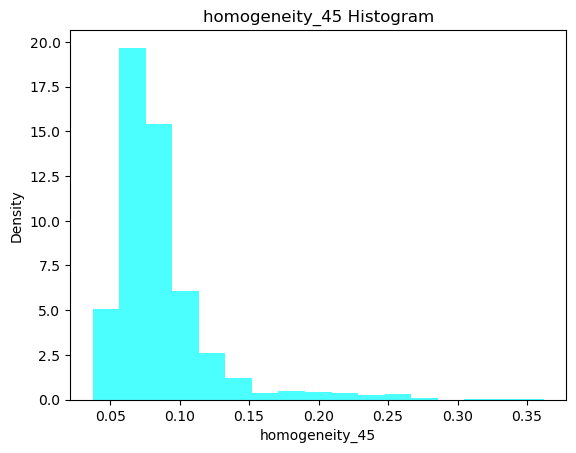

Mean Homogeneity: 0.08553405110671115
Variance Homogeneity: 0.0012088797487290548


In [12]:
homogeneity_45_data = data['homogeneity_45']

hist, bins, _ = plt.hist(homogeneity_45_data, bins=17, density=True, alpha=0.7, color='cyan')

mean_homogeneity_45 = np.mean(homogeneity_45_data)
variance_homogeneity_45 = np.var(homogeneity_45_data)

plt.xlabel('homogeneity_45')
plt.ylabel('Density')
plt.title('homogeneity_45 Histogram')

plt.show()

print("Mean Homogeneity:", mean_homogeneity_45)
print("Variance Homogeneity:", variance_homogeneity_45)

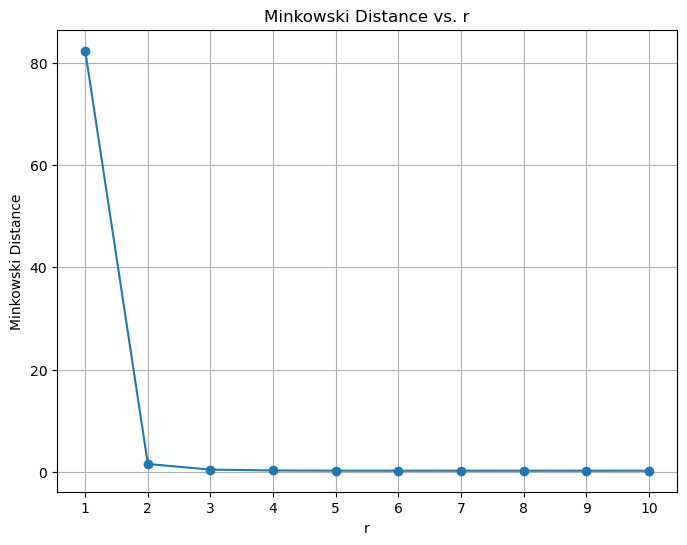

In [13]:
ASM_0_data = data['ASM_0']
energy_0_data = data['energy_0']

r_values = np.arange(1, 11)  

distances = []

for r in r_values:
    distance = np.power(np.abs(ASM_0_data - energy_0_data), r).sum() ** (1 / r)
    distances.append(distance)

plt.figure(figsize=(8, 6))
plt.plot(r_values, distances, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.xticks(r_values)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
feature_columns = [
    'dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90', 'dissimilarity_135',
    'correlation_0', 'correlation_45', 'correlation_90', 'correlation_135',
    'energy_0', 'energy_45', 'energy_90', 'energy_135']
X = data[feature_columns]
y = data['label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [38]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=3) 
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [39]:
k_3_score=neigh.score(X_test, y_test)
print(k_3_score)

0.8476658476658476


C:\Users\saibh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
# Extract values for each feature from your dataset
dissimilarity_0 = 62
dissimilarity_45 = 30.43
dissimilarity_90 = 53
dissimilarity_135 = 65.07
correlation_0 = 7.87
correlation_45 = 0.72 
correlation_90 = 0.64  
correlation_135 = 0.608713  
homogeneity_0 = 0.275196  
homogeneity_45 = 0.256529  
homogeneity_90 = 0.256  
homogeneity_135 = 0.1973 


new_data_point = [[
    dissimilarity_0,
    dissimilarity_45,
    dissimilarity_90,
    dissimilarity_135,
    correlation_0,
    correlation_45,
    correlation_90,
    correlation_135,
    homogeneity_0,
    homogeneity_45,
    homogeneity_90,
    homogeneity_135
]]


prediction = neigh.predict(new_data_point)
print(prediction)


[0]


C:\Users\saibh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\saibh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\saibh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\saibh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\saibh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\saibh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

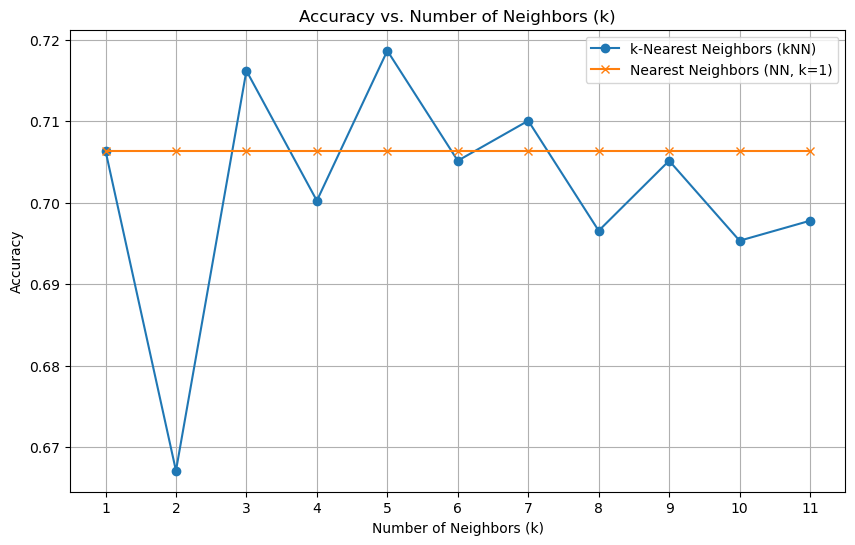

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
knn_accuracies = [] 
k_values = range(1, 12)

for k in k_values:
   
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test)
    
    knn_accuracy = accuracy_score(y_test, y_pred_knn)
    knn_accuracies.append(knn_accuracy)
    
    nn_classifier = KNeighborsClassifier(n_neighbors=1)
    nn_classifier.fit(X_train, y_train)
    y_pred_nn = nn_classifier.predict(X_test)
    
    nn_accuracy = accuracy_score(y_test, y_pred_nn)
    nn_accuracies.append(nn_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o', label='k-Nearest Neighbors (kNN)')
plt.plot(k_values, nn_accuracies, marker='x', label='Nearest Neighbors (NN, k=1)')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

C:\Users\saibh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\saibh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

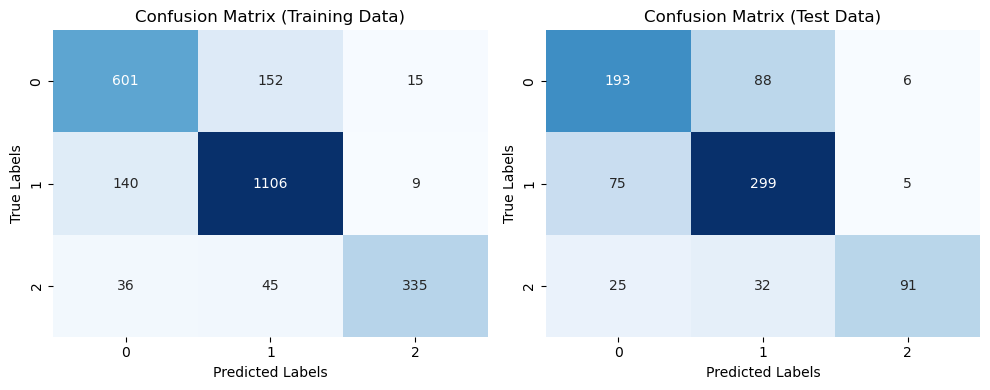

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       768
           1       0.85      0.88      0.86      1255
           2       0.93      0.81      0.86       416

    accuracy                           0.84      2439
   macro avg       0.85      0.82      0.84      2439
weighted avg       0.84      0.84      0.84      2439


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.66      0.67      0.67       287
           1       0.71      0.79      0.75       379
           2       0.89      0.61      0.73       148

    accuracy                           0.72       814
   macro avg       0.75      0.69      0.71       814
weighted avg       0.73      0.72      0.72       814



In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

neigh.fit(X_train, y_train)
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
report_train = classification_report(y_train, y_train_pred)

cm_test = confusion_matrix(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

print("Classification Report (Training Data):\n", report_train)
print("\nClassification Report (Test Data):\n", report_test)